In [52]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Looking at some countries and fields of information about them, such as;
GDP, Birth Rate, Death Rate, and many more.

In [53]:
dt_c = pd.read_csv('countries of the world.csv')
dt_c



,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [54]:
dt_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

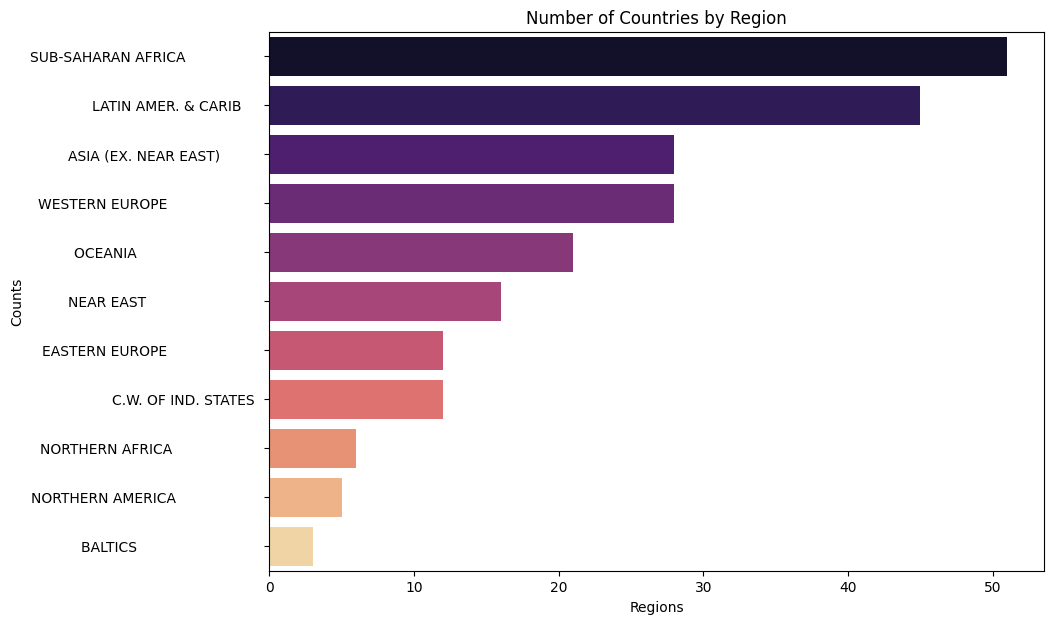

In [55]:
region = dt_c['Region'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(y=region.index, x=region.values, palette='magma')
plt.title('Number of Countries by Region')
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.show()

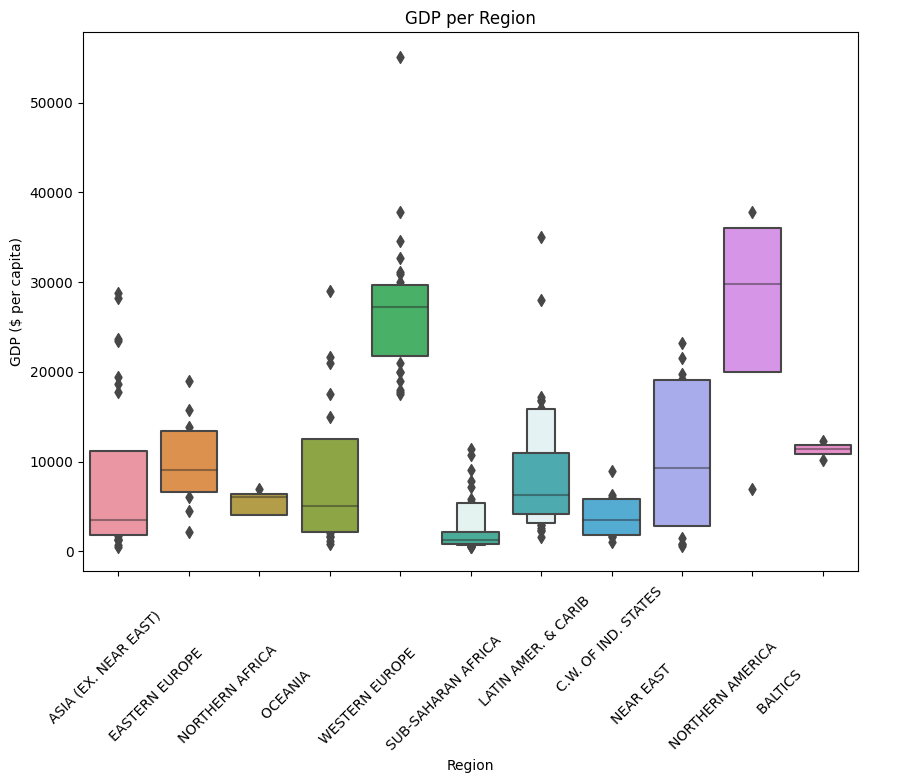

In [56]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=dt_c, x='Region', y='GDP ($ per capita)')
plt.title('GDP per Region')
plt.xticks(rotation=45)
plt.show()


In [57]:
regions=dt_c.Region.unique()
dt_c['Pop. Density (per sq. mi.)']=([float(each.replace(',','.')) for each in dt_c['Pop. Density (per sq. mi.)']])
population=[]
pop_density=[]
for i in regions:
    x=dt_c[dt_c.Region==i]
    population.append(sum(x.Population))
    pop_density.append(sum(x['Pop. Density (per sq. mi.)']))
pop_reg=pd.DataFrame({"Regions":regions,
                    "Population":population,
                    "PopulationDensity":pop_density})
pop_reg.sort_values(by=['Population'],inplace=True,ascending=False)

In [58]:
population_pie={
  "data": [
    {
      "values": pop_reg.Population,
      "labels": pop_reg.Regions,
      "domain": {"x": [0, .8],
                "y": [0, .8]},
      "name": "Population Rate of Regions",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Population Rate of Regions",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Population Rate of Regions",
                "x": 0.27,
                "y": 1
            },
        ]
    }
}
    
iplot(population_pie)

In [59]:
population_bar=go.Bar(x=pop_reg.Regions,
                      y=pop_reg.Population,
                     name="Population",
                     marker = dict(color = 'rgba(50, 134, 55, 0.5)',
                     line=dict(color='rgb(0,0,0)',width=1.5)),
                     text=pop_reg.Regions,
                     )
layout=go.Layout(title='Population by Regions',)
fig=go.Figure(data=population_bar,layout=layout)
iplot(fig)


In [60]:
pop_den=pop_reg.sort_values(by=['PopulationDensity'],ascending=False)
pop_density_bar=go.Bar(x=pop_den.Regions,
                      y=pop_den.PopulationDensity,
                     name="Population Density",
                     marker = dict(color = 'rgba(50, 134, 55, 0.5)',
                     line=dict(color='rgb(0,0,0)',width=1.5)),
                     text=pop_den.Regions,
                     )
layout=go.Layout(title='Population Density by Regions (per sq. mi.)',)
fig=go.Figure(data=pop_density_bar,layout=layout)
iplot(fig)

### Top 10 Countries with the Most Population

In [61]:
data_pop=dt_c.loc[:,['Country','Population']]
data_pop.sort_values(by=['Population'],inplace=True,ascending=False)
pop_bar=px.bar(data_pop[:10],x='Country',y='Population',title="Top 10 Countries with the Most Population")
pop_bar.show()

In [63]:
data_infant_morality=dt_c.loc[:,['Country','Infant mortality (per 1000 births)']]
data_infant_morality.dropna(inplace=True)
data_infant_morality['Infant mortality (per 1000 births)']=[float(each.replace(',','.')) for each in data_infant_morality['Infant mortality (per 1000 births)']]


### Top 10 Countries with Highest Infant Mortality Rates¶


In [64]:
data_infant_morality.sort_values(by=['Infant mortality (per 1000 births)'],inplace=True,ascending=False)
inf_mor_bar=px.bar(data_infant_morality[:10],x='Country',y='Infant mortality (per 1000 births)',title="Top 10 Countries with Highest Infant Mortality Rates")
inf_mor_bar.show()

In [65]:
birthrate = go.Scatter(
    x = dt_c.index,
    y = dt_c.Birthrate,
    mode = 'lines+markers',
    name = 'Birthrate',
    marker = dict(color = 'rgba(10, 255, 10, 0.5)'),
    text = dt_c.Country)

deathrate = go.Scatter(
    x = dt_c.index,
    y = dt_c.Deathrate,
    mode = 'lines+markers',
    name = 'Deathrate',
    marker = dict(color = 'rgba(255, 10, 10, 0.5)'),
    text = dt_c.Country)

layout = dict(title = 'Birth and Death Rate of Countries',
             xaxis= dict(zeroline= False)
             )

data = [birthrate, deathrate]
fig = dict(data = data, layout = layout)

iplot(fig)